#Bài 1: Cho file dữ liệu Moves.csv hãy thực hiện các yêu cầu sau:

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')



dataset=pd.read_csv('/content/gdrive/MyDrive/Dataset/Moves.csv')
dataset

Mounted at /content/gdrive


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


#Xử lý data

In [ ]:
dataset.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [ ]:
dataset = dataset.drop(columns='color')


In [ ]:
dataset.shape

(5043, 26)

In [ ]:
#check Null
missing = dataset.isna().any(axis=1)
missing.sum()

1286

In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(3757, 26)

In [ ]:
#Check trùng lặp
dups = dataset.duplicated()
print(dups.any().sum())
# print(dataset[dups])
dataset.drop_duplicates(inplace=True)
dataset.shape

1


(3724, 26)

#2.1. Hãy biểu diễn biểu đồ thị trực quan với file dữ liệu sinh viên tự chọn ít nhất 3 biến giá trị. (2 điểm)

Movies are analyzed in which language the most?

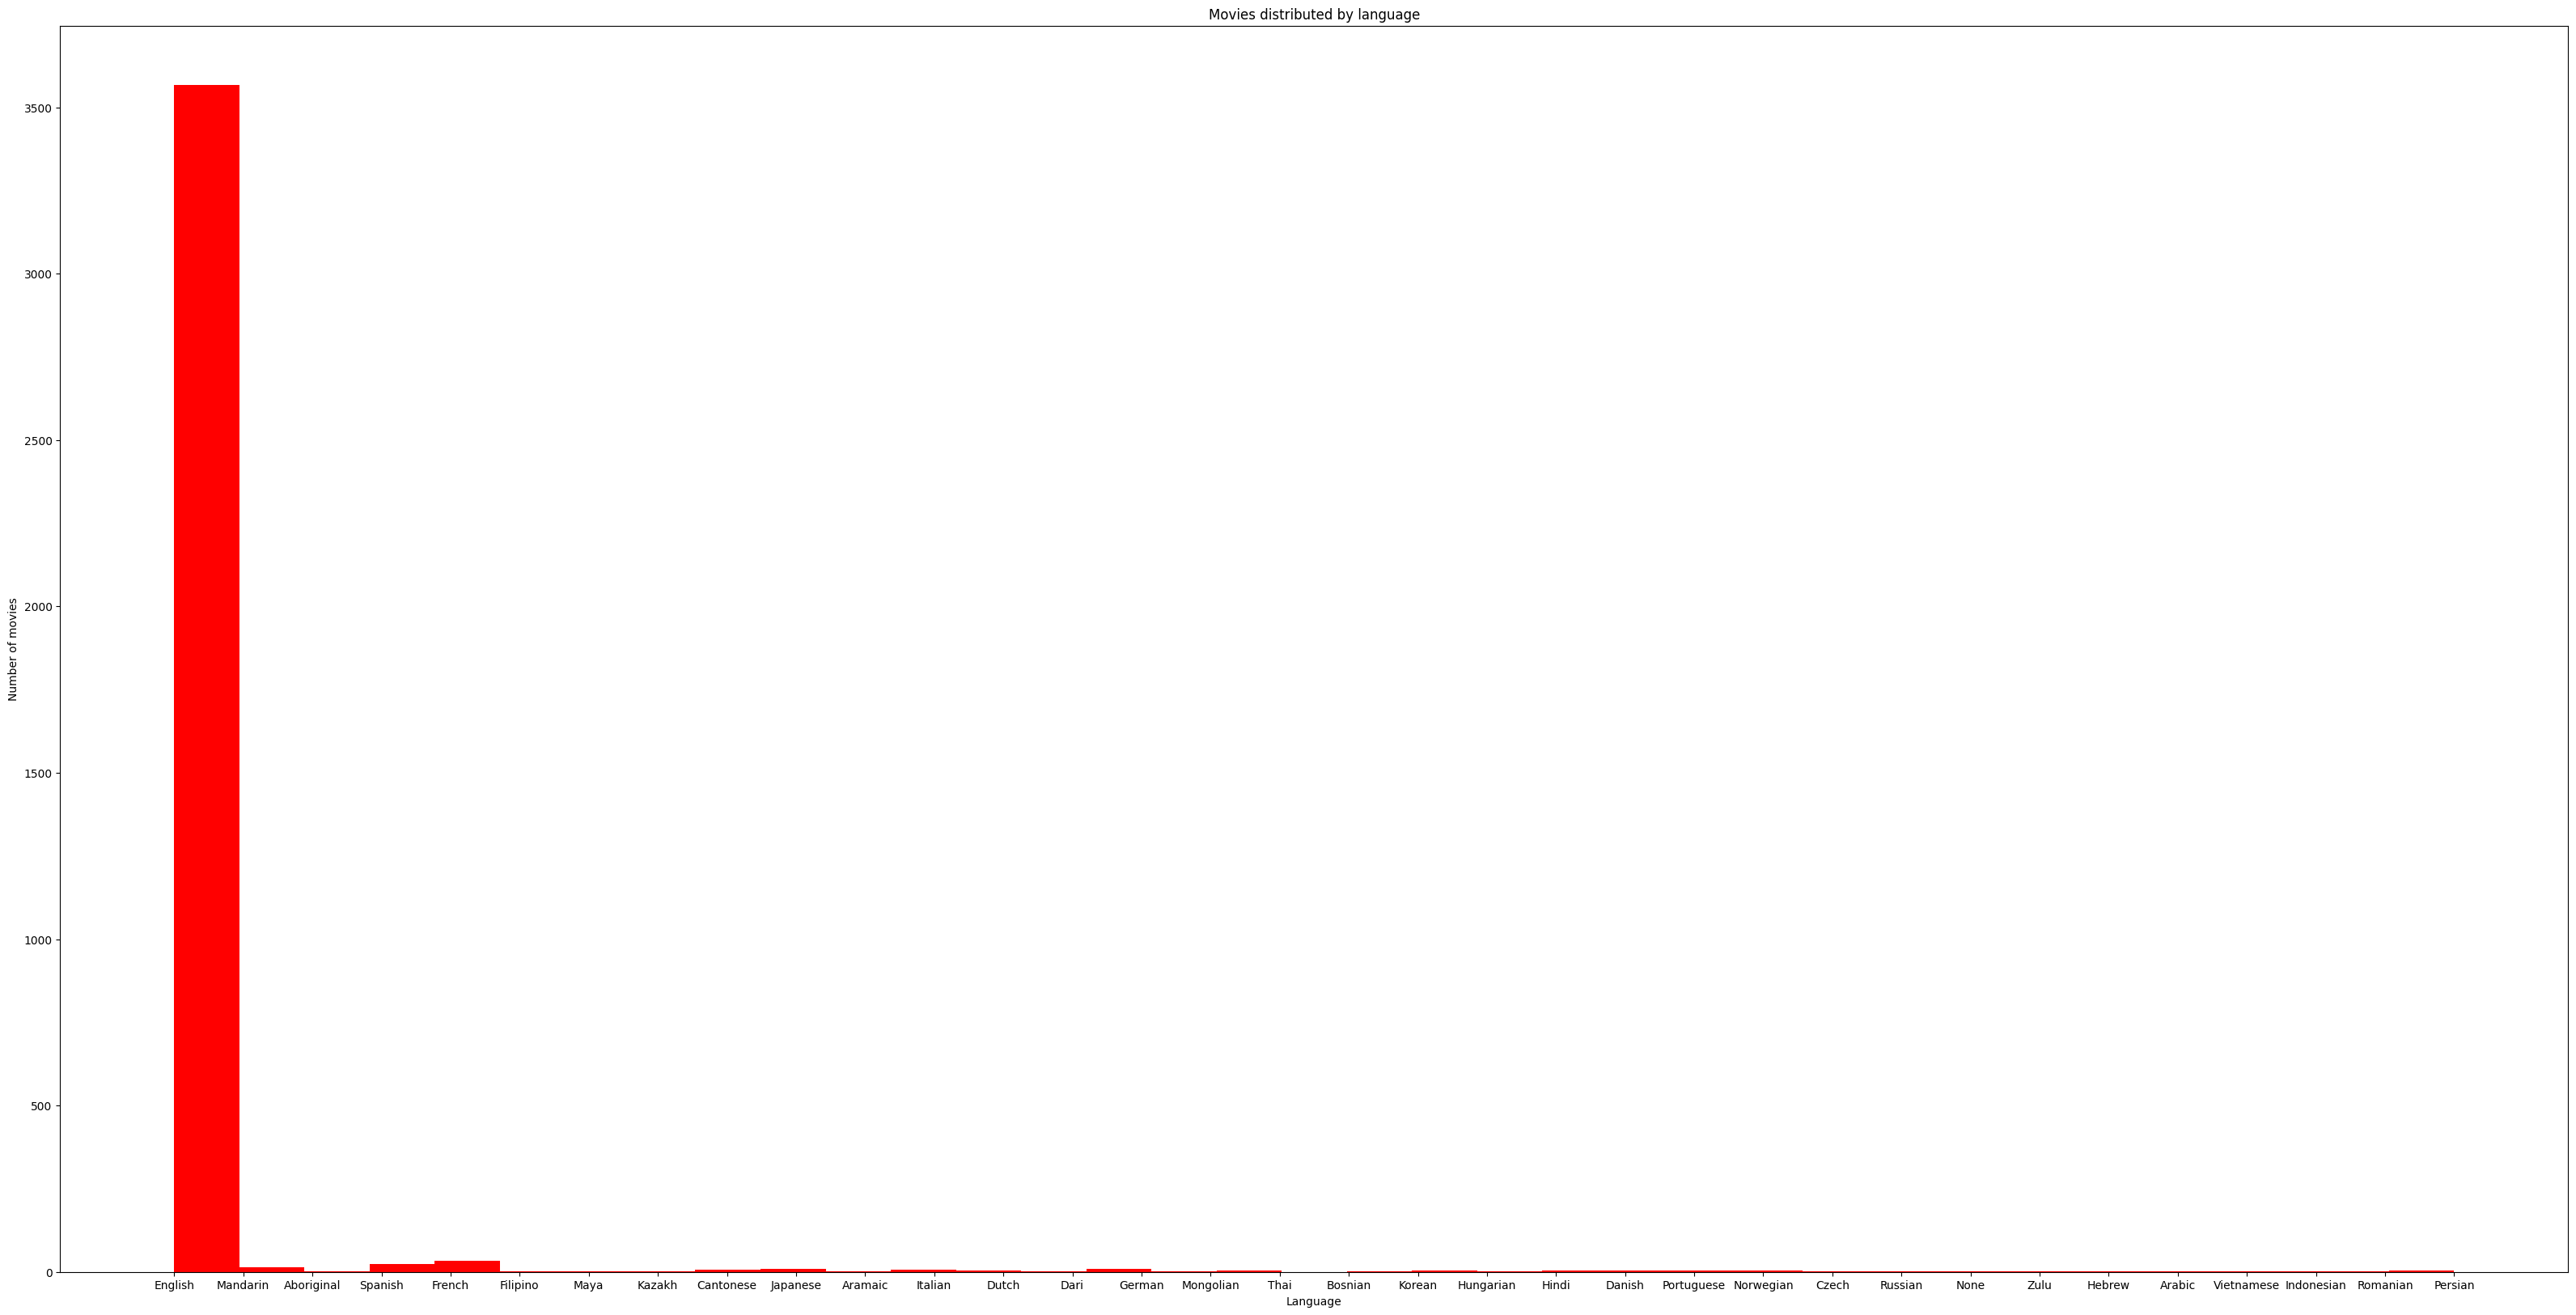

In [ ]:
dataset['language'].value_counts()
plt.figure(figsize=(40,20))
plt.hist(x = dataset.language,bins=35, color = 'red')
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.title('Movies distributed by language')
plt.show()

Movies are analyzed in which country the most?

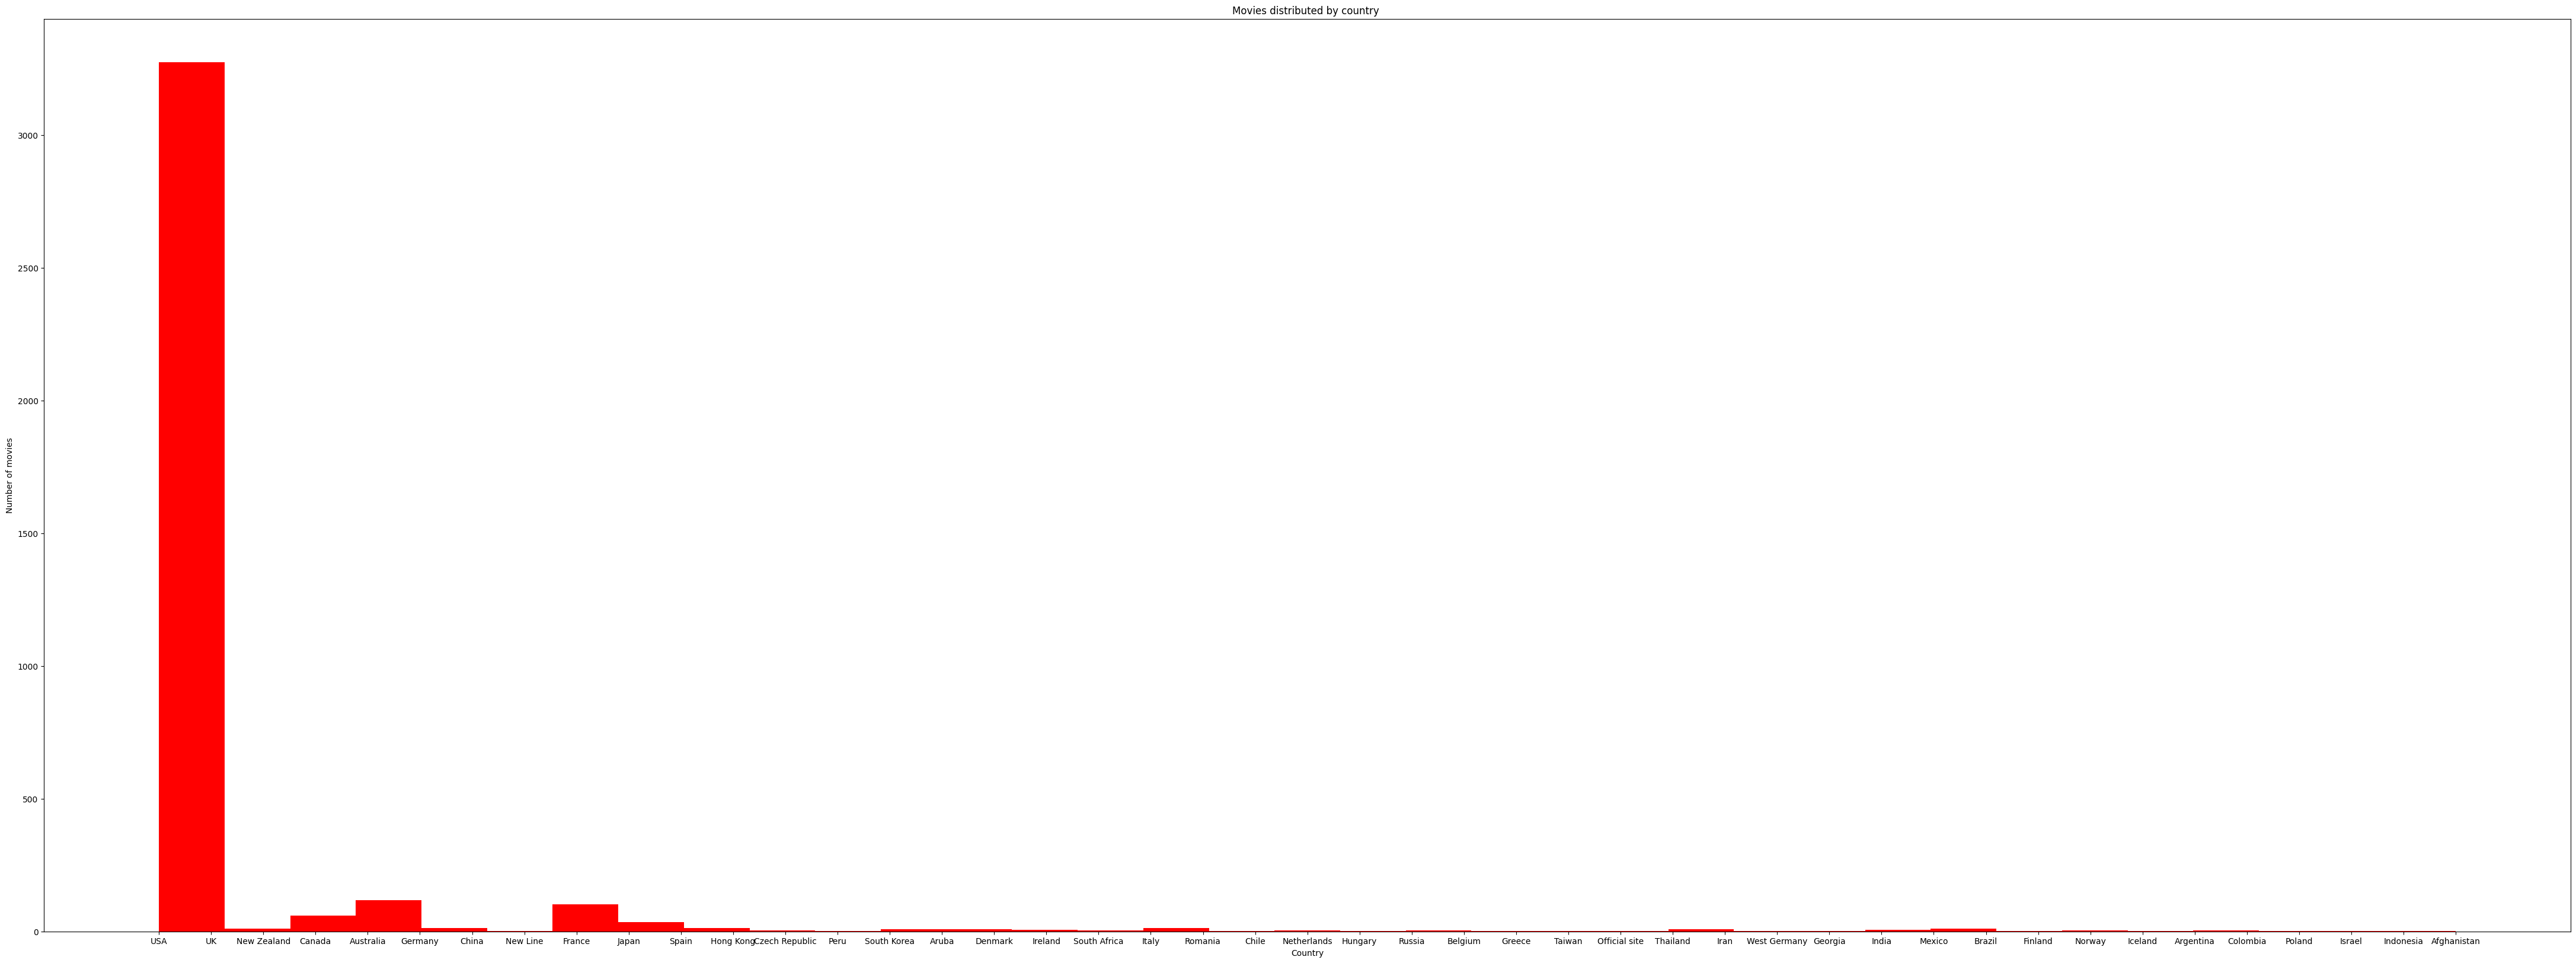

In [ ]:
dataset['country'].value_counts()
plt.figure(figsize=(55,20))
plt.hist(x = dataset.country,bins=35, color = 'red')
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title('Movies distributed by country ')
plt.show()

Movies are analyzed in which contetnt_rating the most?

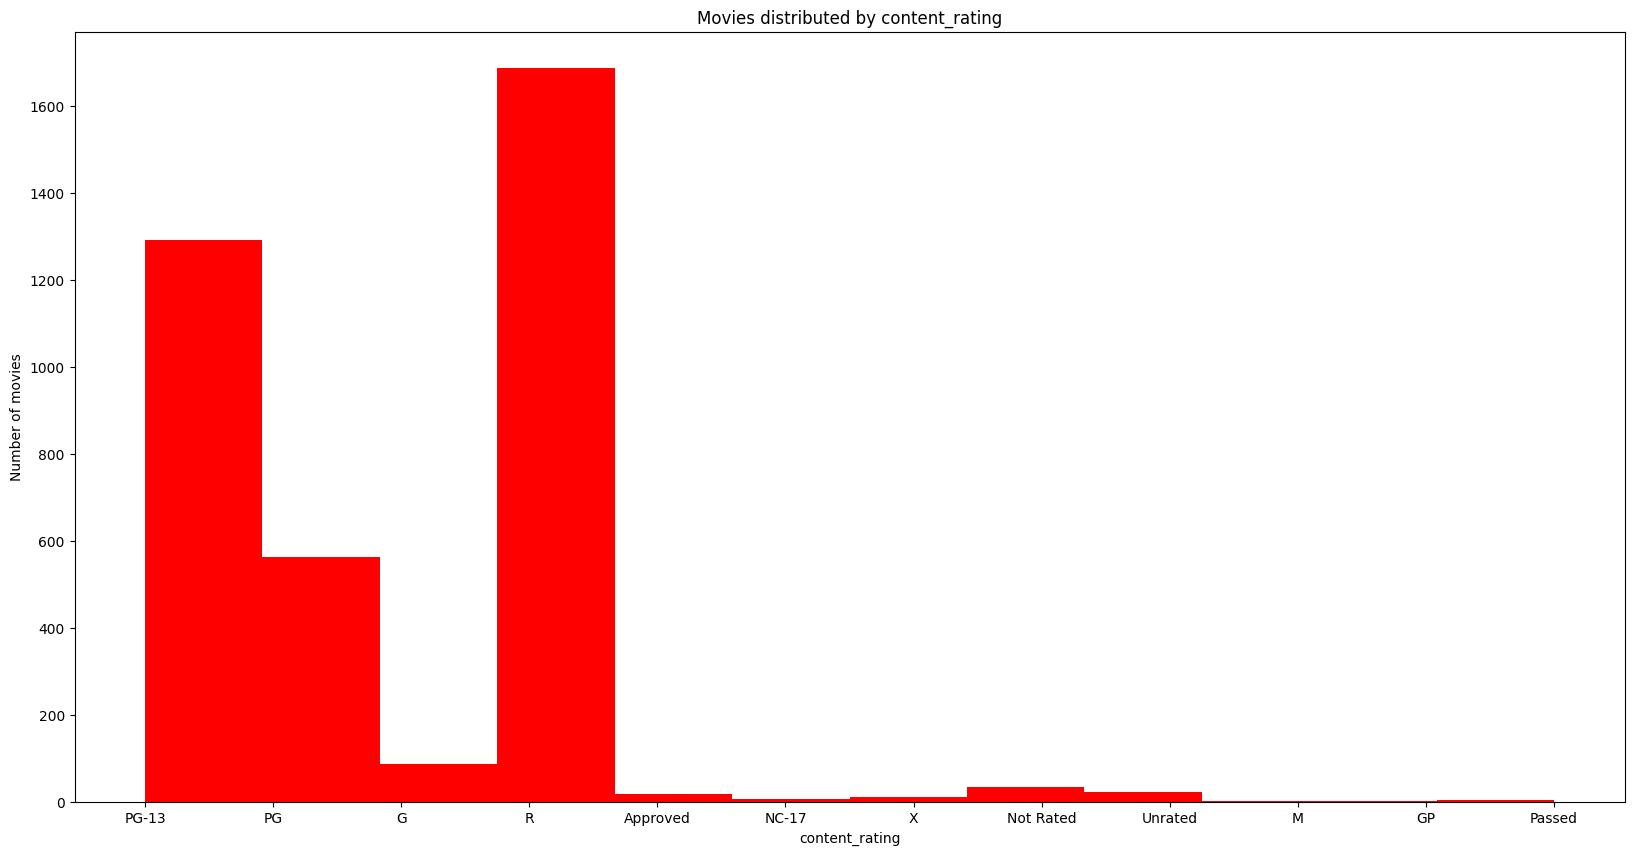

In [ ]:
dataset['content_rating'].value_counts()
plt.figure(figsize=(20,10))
plt.hist(x = dataset.content_rating,bins=12, color = 'red')
plt.xlabel('content_rating')
plt.ylabel('Number of movies')
plt.title('Movies distributed by content_rating')
plt.show()


Movies are analyzed in which year the most?

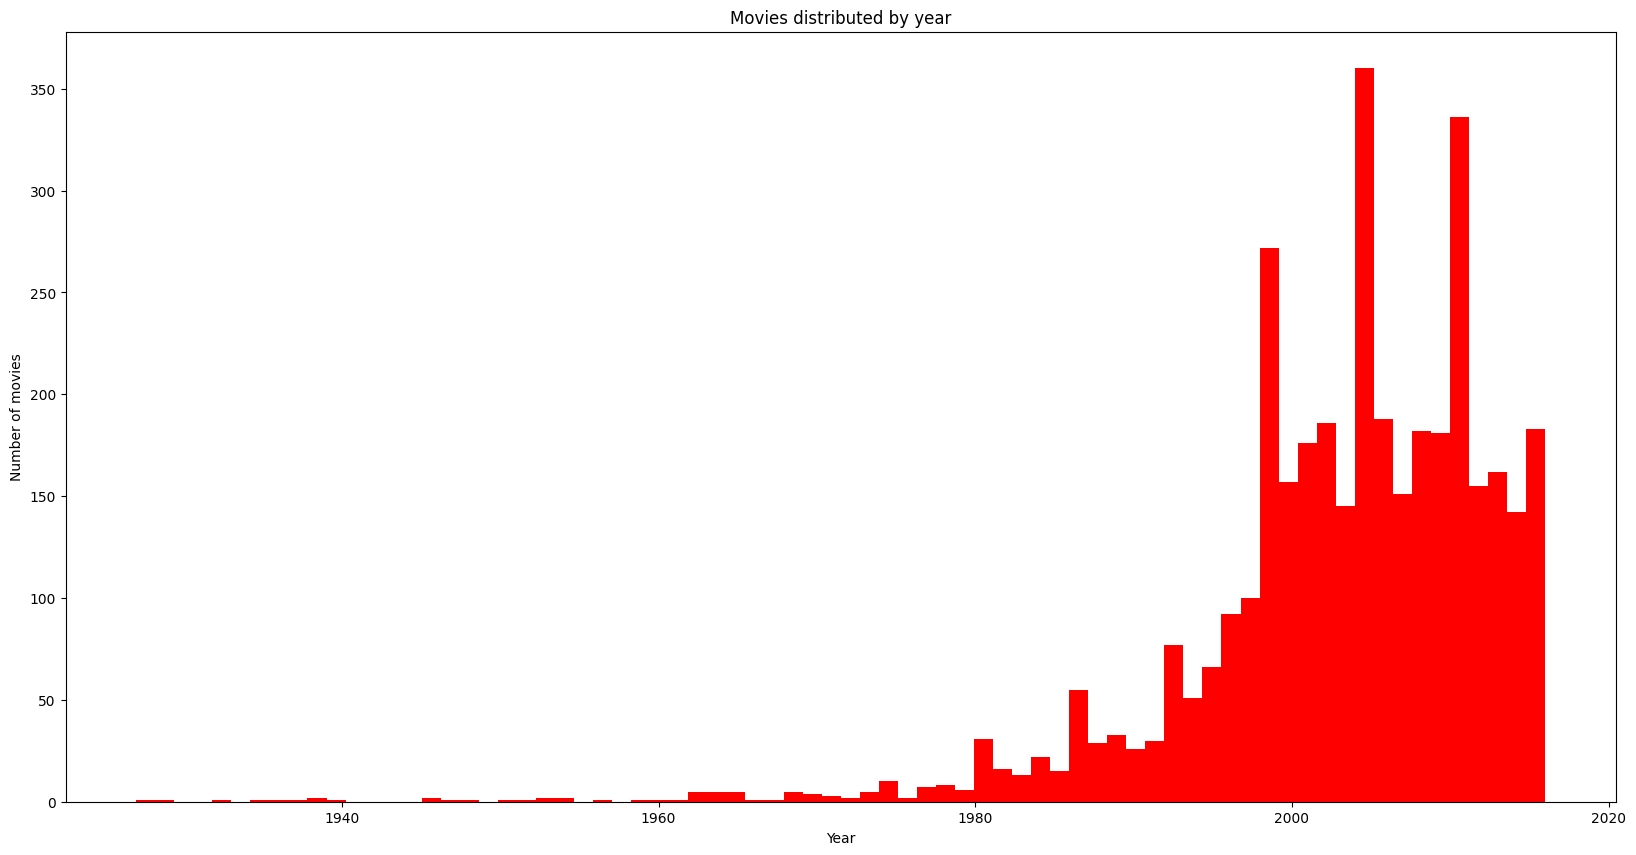

In [ ]:
dataset['title_year'].value_counts()
plt.figure(figsize=(20,10))
plt.hist(x = dataset.title_year,bins=74, color = 'red')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movies distributed by year')
plt.show()


In [ ]:
#Gán nhãn cho cột imdb_scord
dataset['imdb_score_N'] = np.where(dataset['imdb_score'] >= 8.0, 'Cao', np.where(dataset['imdb_score'] >= 7, 'Khá ', np.where(dataset['imdb_score'] >= 5, 'Bình thường ','Thấp')))

In [ ]:
dataset.shape

(3724, 27)

Movies are analyzed in which Imdb_score the most?

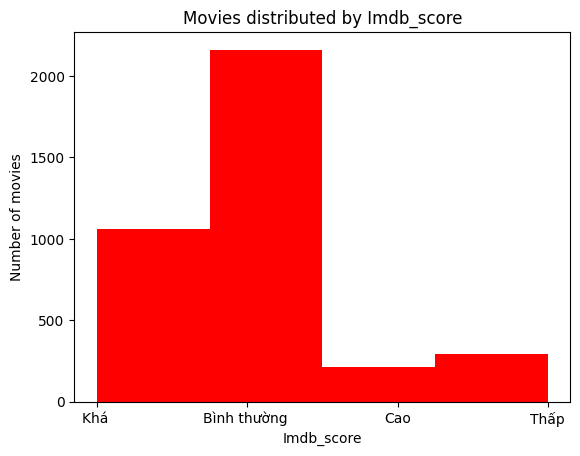

In [ ]:
dataset['imdb_score_N'].value_counts()
plt.hist(x = dataset.imdb_score_N,bins=4, color = 'red')
plt.xlabel('Imdb_score')
plt.ylabel('Number of movies')
plt.title('Movies distributed by Imdb_score')
plt.show()


#2.2 Sinh Viên tự chọn 1 trong 4 câu sau để thực hiện (3 điểm)

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot = True, cmap='Blues')
plt.show()


In [ ]:
dataset.columns

In [ ]:
#2.2.1. Xây dựng ứng dụng phương trình hồi quy đơn biến và dự báo số liệu
#lấy cột actor_1_facebook_likes làm biến truyền vào
#lấy cột cast_total_facebook_likes làm biến cầm tìm
x1 = dataset[['actor_1_facebook_likes']]
y1 = dataset['cast_total_facebook_likes']

#khai báo thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score


#cắt data
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.2 , random_state=42)

#train
model =LinearRegression()
model.fit(X_train1,y_train1)
y_dudoan1 = model.predict(X_test1)
# print('kết quả được dự đoán ',y_dudoan)
#sai số
r2 = r2_score(y_dudoan1,y_test1)
mse = mean_squared_error(y_dudoan1,y_test1)

cross = cross_val_score(model,X_train1,y_train1)
print('=====================================================')
print('R2',r2)
print('MSE',mse)
print('RMSE',np.sqrt(mse))
print('Accuracy: %.3f (%.3f)'%(np.mean(cross) , np.std(cross)))
print('=====================================================')
print('Dự báo số liệu')
y=20132
x=np.array([[19000.0]])
test_dubao1 = model.predict(x)
print('X truyền vào ',x)
print('Kết quả dự đoán ',test_dubao1)
print('Kết quả thực =',y)
print('=====================================================')

In [ ]:
#2.2.2. Xây dựng ứng dụng phương trình hồi quy đa biến và dự báo số liệu
#2.2.1. Xây dựng ứng dụng phương trình hồi quy đơn biến và dự báo số liệu
#lấy cột actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes làm biến truyền vào
#lấy cột cast_total_facebook_likes làm biến cầm tìm
x2 = dataset[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]
y2 = dataset['cast_total_facebook_likes']


#cắt data
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2 , random_state=42)

#train
model2 =LinearRegression()
model2.fit(X_train2,y_train2)
y_dudoan2 = model2.predict(X_test2)
# print('kết quả được dự đoán ',y_dudoan)
#sai số
r2 = r2_score(y_dudoan2,y_test2)
mse = mean_squared_error(y_dudoan2,y_test2)

cross = cross_val_score(model2,X_train2,y_train2)
print('=====================================================')
print('R2',r2)
print('MEAN',mse)
print('RMSE',np.sqrt(mse))
print('Accuracy: %.3f (%.3f)'%(np.mean(cross) , np.std(cross)))
print('=====================================================')
print('Dự báo số liệu')
y=32288
x=[[18000.0,	14000.0,	99.0]]
test_dubao = model2.predict(x)
print('X truyền vào ',x)
print('Kết quả dự đoán ',test_dubao)
print('Giá trị thực của y',y)
print('=====================================================')

In [ ]:
#Gán nhãn cho cột imdb_scord
dataset['imdb_score_Nn'] = np.where(dataset['imdb_score'] >= 8.0, 1, np.where(dataset['imdb_score'] >= 7, 2, np.where(dataset['imdb_score'] >= 5, 3,4)))


In [ ]:
#2.2.3. Xây dựng ứng dụng phương trình hồi quy Logistics và dự báo số liệu
#ta sẽ lấy cột imdb_score_Nn để dự chất lượng phim thông qua các cột actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,gross
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
x3 = dataset[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','gross']]
y3 = dataset['imdb_score_Nn']


#cắt data
X_train3,X_test3,y_train3,y_test3 = train_test_split(x3,y3, test_size=0.2 , random_state=42)

#train
model3 =LogisticRegression()
model3.fit(X_train3,y_train3)
y_dudoan3 = model3.predict(X_test3)
# print('kết quả được dự đoán ',y_dudoan)
#sai số
r2 = r2_score(y_dudoan3,y_test3)
mse = mean_squared_error(y_dudoan3,y_test3)
cross = cross_val_score(model3,X_train3,y_train3)
print('============================================')
print('R2',r2)
print('MSE',mse)
print('RMSE',np.sqrt(mse))
print('Accuracy: %.3f (%.3f)'%(np.mean(cross) , np.std(cross)))
confusion_matrix =confusion_matrix(y_dudoan3,y_test3)
print('=============================================')
print(confusion_matrix)
print('=============================================')

print('Dự báo kết quả')
y=3
x=np.array([[19000.0,427.0,405.0,20132,10515579.0]])
y_dubao = model3.predict(x)
print('X truyền vào ',x)
print('Kết quả dự báo ',y_dubao)
print('Giá trị thực của y',y)
print('=============================================')

In [ ]:
from sklearn.preprocessing import StandardScaler
#cắt data
x4 = dataset[['duration','budget','director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes','num_voted_users','title_year','movie_facebook_likes']]
y4=dataset['gross']
X_train4,X_test4,y_train4,y_test4 = train_test_split(x4,y4 , test_size = 0.2 , random_state=0)
#Chuẩn hóa dữ liệu
sc =StandardScaler()
X_train4_sc = sc.fit_transform(X_train4)
X_test4_sc = sc.fit_transform(X_test4)


In [ ]:
#2.2.4. Xây dựng các thuật toán ANN để phân tích dữ liệu, tạo tập dữ liệu học và huấn luyện dựa trên các biến dữ liệu có trong file.
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Train

model4 = Sequential()
model4.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model4.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model4.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model4.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model4.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model4.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model4.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_squared_error'])
#in thông tin mô hình
model4.summary()


In [ ]:
#huấn luyện mô hình
model4.fit(X_train4_sc, y_train4 , batch_size = 10 , epochs = 50)

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
loss = model4.evaluate(X_test4_sc, y_test4)
print("Mean Squared Error on Test Data:", loss)


In [ ]:
#Dự đoán
x=sc.transform([[169.0	,300000000.0	,563.0	,40000.0	,5000.0	,1000.0	,48350	,471220	,2007.0	,0]])
new_test = model4.predict(x)
print(new_test)

#2.3 Tìm tỉ lệ phim với tỉ lệ bình chọn là PG dựa vào cột dữ liệu content_rating và budget. (2 điểm)

In [ ]:
pg_movies = dataset.loc[dataset['content_rating']== 'PG']
pg_movies
pg_budget = pg_movies['budget']
pg_budget
print('Tỉ lệ phim ',len(pg_budget)/len(dataset)*100)